In [ ]:
#Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Carga del fichero desde el enlace web y creación del dataframe
url_data = 'https://raw.githubusercontent.com/levraines/data/master/datos_ventas.csv'

# Creación Dataframe
df = pd.read_csv(url_data, sep=';' , decimal=',' , encoding='utf-8')

In [ ]:
# Visualización del dataframe (la cabecera)
df.head(5)

,Fecha_anual,Inversion,Ventas
0,1980,1.0,4.61
1,1981,1.5,5.18
2,1982,2.0,5.09
3,1983,2.5,5.44
4,1984,3.0,0.62


In [ ]:
# Resumen información del fichero
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_anual  38 non-null     int64  
 1   Inversion    38 non-null     float64
 2   Ventas       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB
None


**Análisis del tipo de variables con que se trabajará:**

**1. Fecha anual:** corresponde al año en que se han realizado las inversiones y las ventas. La naturaleza de la variable es **cuantitativa continua**, ya que hace alusión a la variable tiempo. A nivel de dataset viene expresada como una variable de tipo **int64** sin embargo, corresponde a una variable de tipo cualitativa ordinal, ya que podemos ordenar los datos por el año específico en que sucedió cada inversión o venta. Por último a nivel de análisis de datos corresponde a una variable de **clasificación**, porque sus categorías o grupos son mutuamente excluyentes.

**Inversión:** corresponde a la cantidad de millones de euros que se han tomado para inversión. La naturaleza de la variable es **cuantitativa continua**, ya que corresponde a una variable que puede tomar cualquier valor dentro de un intervalo. A nivel de dataset viene expresada como una variable de tipo **float** (cuantitativa continua), ya que puede tomar cualquier valor posible dentro de un intervalo. Por último a nivel de análisis de datos corresponde a una variable **analítica**. 

**Ventas:** corresponde a la cantidad de millones de euros que se han generado por rubro de ventas. La naturaleza de la variable es **cuantitativa continua**, ya que corresponde a una variable que puede tomar cualquier valor dentro de un intervalo. A nivel de dataset viene expresada como una variable de tipo **float** (cuantitativa continua), ya que puede tomar cualquier valor posible dentro de un intervalo. Por último a nivel de análisis de datos corresponde a una variable **analítica**. 



**Medidas de centralización para las variables: Inversión y Ventas**

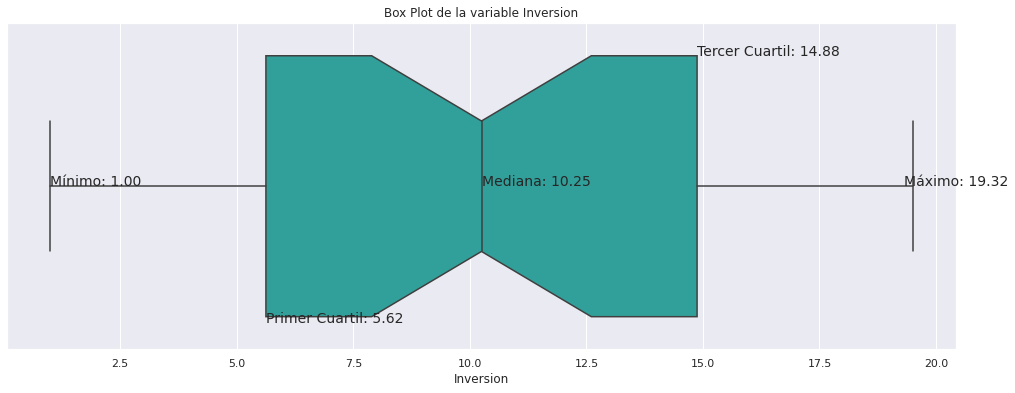

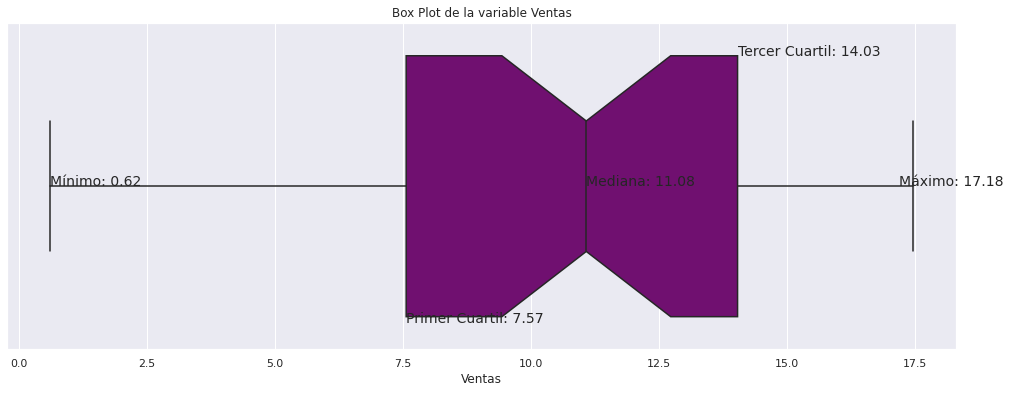

In [ ]:
# Box-plot de la variable Inversion
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(17,6))
sns.boxplot(df["Inversion"], notch = True, color = "lightseagreen")
plt.title("Box Plot de la variable Inversion")
plt.text(df["Inversion"].quantile(0.50), 0.00, "Mediana: %.2f" % df["Inversion"].quantile(0.50), fontsize=14)
plt.text(df["Inversion"].quantile(0.25), 0.42, "Primer Cuartil: %.2f" % df["Inversion"].quantile(0.25), fontsize=14)
plt.text(df["Inversion"].quantile(0.75), -0.4, "Tercer Cuartil: %.2f" % df["Inversion"].quantile(0.75), fontsize=14)
plt.text(df["Inversion"].quantile(0.00), 0.00, "Mínimo: %.2f" % df["Inversion"].quantile(0.00), fontsize=14)
plt.text(df["Inversion"].quantile(0.99), 0.00, "Máximo: %.2f" % df["Inversion"].quantile(0.99), fontsize=14)
plt.show()

plt.figure(figsize=(17,6))
sns.boxplot(df["Ventas"], notch = True, color = "purple")
plt.title("Box Plot de la variable Ventas")
plt.text(df["Ventas"].quantile(0.50), 0.00, "Mediana: %.2f" % df["Ventas"].quantile(0.50), fontsize=14)
plt.text(df["Ventas"].quantile(0.25), 0.42, "Primer Cuartil: %.2f" % df["Ventas"].quantile(0.25), fontsize=14)
plt.text(df["Ventas"].quantile(0.75), -0.4, "Tercer Cuartil: %.2f" % df["Ventas"].quantile(0.75), fontsize=14)
plt.text(df["Ventas"].quantile(0.00), 0.00, "Mínimo: %.2f" % df["Ventas"].quantile(0.00), fontsize=14)
plt.text(df["Ventas"].quantile(0.99), 0.00, "Máximo: %.2f" % df["Ventas"].quantile(0.99), fontsize=14)
plt.show()

**Análisis:** 

**Inversión:** se puede visualizar como la inversión más pequeña en el lote de datos (mínimo) es de 1 millón. La inversión cuyo valor representa el más alto del set de datos (máximo) es de 19.32 millones, la mediana corresponde a 10.25 millones de euros, es decir, 50% de las inversiones son iguales o inferiores a 10.25 millones de euros, el primer cuartil corresponde a 5.62 millones, es decir, 25% de las inversiones son iguales o menores a  5.62 millones de euros y finalmente el tercer cuartil corrresponde a 14.88 millones de euros, esto quiere decir, que el 75% de las inversiones son iguales o menores a 14.88 millones de euros.

**Ventas:** la venta más pequeña en el lote de datos (mínimo) es de 0.62 millones de euros. La venta cuyo valor representa el más alto del set de datos (máximo) es de 17.18 millones, la mediana corresponde a 11.08 millones de euros, es decir, 50% de las ventas son iguales o inferiores a 11.08 millones euros, el primer cuartil corresponde a 7.5650 millones, es decir, 25% de las ventas son iguales o menores a  7.57 millones de euros y finalmente el tercer cuartil corrresponde a 14.03 millones de euros, esto quiere decir, que el 75% de las ventas son iguales o menores a 14.03 millones de euros.

Finalmente en ambas variables no se detectan outliers o valores extremos.

In [ ]:
# Rango variable Fecha anual
df['Fecha_anual'].quantile(1)-df['Fecha_anual'].quantile(0)

37.0

**Análisis:** Con respecto a la variable Fecha Anual se están tomando datos de 37 años, es decir, esta variable va desde 1980 hasta 2017 y ningún año se repite. 

Primero antes de hacer el modelo de regresión se optará por hacer un estudio rápido de las variables a utilizar en el modelo, en este caso se quiere entender si hay alguna representación de linealidad entre las variables: inversión y ventas. 

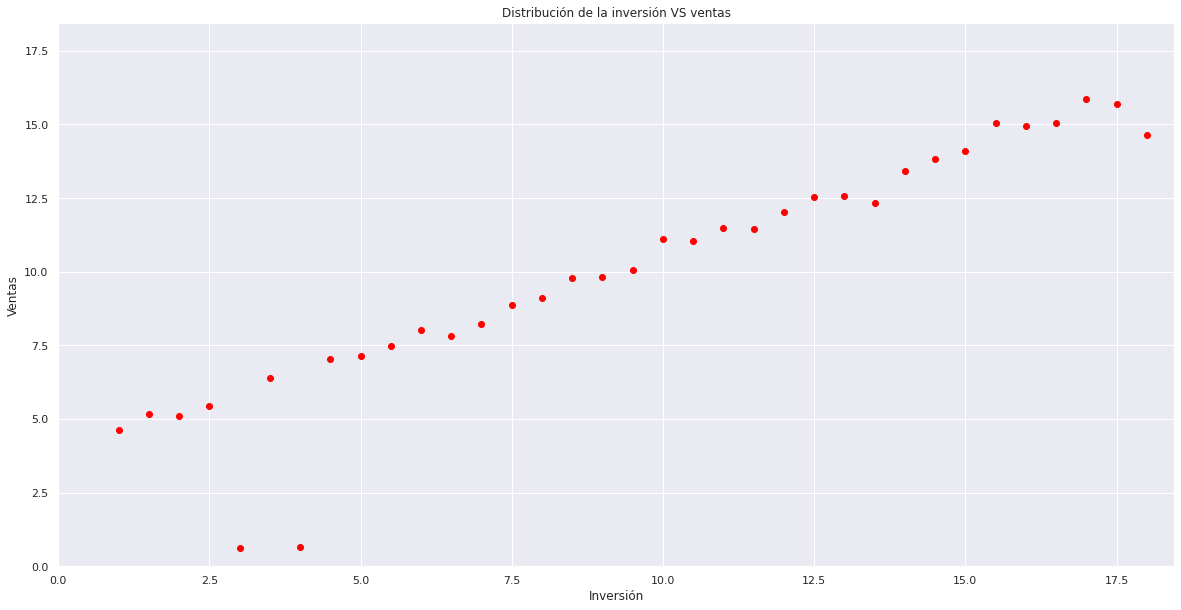

In [ ]:
# Representación de variables: Inversión y ventas
# raw data
inversion = df["Inversion"] 
ventas = df["Ventas"] 

# labels
plt.figure(figsize=(20,10))
plt.title("Distribución de la inversión VS ventas")
plt.xlabel("Inversión")
plt.ylabel("Ventas")

# limits
plt.xlim(inversion.min()-1 , ventas.max()+1 )
plt.ylim(inversion.min()-1 , ventas.max()+1 )

plt.scatter(inversion,ventas, color = 'red')
plt.show()

Se puede visualizar cómo hay una línea recta "imaginaria" o "invisible" que pasa por las observaciones en la gráfica de dispersión. Esto hace que parezca que se trata de una recta de regresión lineal.

In [ ]:
# Calculando covarianza
covarianza = df.cov()["Inversion"]["Ventas"]
covarianza

22.92993243243243

Con la covarianza, vemos que la relación es positiva, es decir, presenta una relación directa. Esto implica que a medida que aumentan las inversiones, hay una tendencia a que suban las ventas.

Para ver si las variables están correladas, se hallará el coeficiente de correlación lineal de Pearson, ya las variables que se están analizando son cuantitativas continuas. 

In [ ]:
# Matriz de correlacion utilizando coeficiente de correlacion lineal de Pearson
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as ss
df.corr(method = 'pearson').style.background_gradient(cmap='coolwarm').set_precision(3)

,Fecha_anual,Inversion,Ventas
Fecha_anual,1.000,1.000,0.956
Inversion,1.000,1.000,0.956
Ventas,0.956,0.956,1.000


El resultado del coeficiente de correlación lineal de Pearson entre las variables Inversión y Ventas está cercano a uno (0.95 o 95%) lo que implica que existe una relación lineal muy fuerte entre las variables analizadas de inversión y ventas, lo que implica que si una crece la otra crecerá y si una decrece la otra también lo hará. 

**Ajustar un modelo de regresión lineal. Obtener una estimación de los parámetros del modelo y su interpretación.**

In [ ]:
# Modelo matemático
pendiente, coeficiente, pearson, p, error = ss.linregress(df["Inversion"], df["Ventas"])

def consumption(income):
    return coeficiente + income*pendiente

In [ ]:
# Obteniendo estimación delos parámetros
print(pendiente, coeficiente, pearson, p, error)

0.7426698763540868 2.8805285042127142 0.9562823420491505 8.25497955552195e-21 0.0378532029452961


**Análisis:**

1. Pendiente: este valor nos indica que por cada millón en inversión las ventas aumentan en promedio, 0.7426 millones de euros. 

2. Coeficiente: este valor representa el intercepto de la función. El valor de la intersección en Y (2.8805) esto indica las ventas promedio para los años que no recibieron inversiones. 

3. Pearson: indica el coeficiente de determinación de pearson, en este caso se puede observar que está cercano a uno (0.956) lo que implica que existe una relación lineal muy fuerte entre las variables analizadas de inversión y ventas, lo que implica que si una crece la otra crecerá y si una decrece la otra también lo hará.

4. P: El valor p de cada término evalúa la hipótesis nula de que el coeficiente es igual a cero (no hay efecto). Un valor p bajo (< 0.05) indica que se puede rechazar la hipótesis nula. En otras palabras, es probable que un predictor que tenga un valor p bajo sea una adición significativa al modelo porque los cambios en el valor del predictor se relacionan con cambios en la variable de respuesta. En este caso los cambios que sucedan en la variable inversión se relacionan con cambios en la variable de ventas. Por el contrario, un valor p más grande (insignificante) sugiere que los cambios en el predictor (inversión) no están asociados con cambios en la respuesta (ventas). Para nuestro ejemplo podemos ver que el p valor es menor a 0.05 por lo que deberías de considerar dejar la variable inversión, ya que los cambios que sucedan en esta se relacionan con los cambios en la variable ventas. 

5. Error: el error estándar de la regresión es el valor que muestra la diferencia entre los valores reales y los estimados de una regresión. Esto indica que desde el punto de vista de las ventas hay una desviación de 0.0378 millones de euros, con este error siempre se busca que sea lo más bajo posible. 

6. Variable X o predictora, también llamada variable independiente: para nuestro ejemplo es la variable inversión. 

7. Variable Y o de respuesta, también llamada variable dependiente: para nuestro ejemplo es la variable ventas.

**¿Cuántas ventas se obtendrían si se invirtiesen 7 millones de euros?**

In [ ]:
# Obteniendo la estimación de las ventas si se invirtieran 7 millones de euros
consumption(7)

8.079217638691322

**Análisis:** según podemos observar mediante la predicción del modelo de consumo, si se invierten 7 millones de euros se podría tener 8.07 millones de euros en ventas. Asimismo se corrobora dicho resultado con el generado en 1992, ya que en ese año se inviertieron 7 millones y se obtuvo 8.22 millones en ventas. Al ser una predicción es muy probable que siempre dé resultados diferentes, pero el resultado obtenido vs el real es bastante cercano.

**Evaluar el modelo a través de la SCE y el coeficiente de determinación.**

In [ ]:
# Calculando el coeficiente de determinación
print(f"R-squared: {pearson**2:.6f}")

R-squared: 0.914476


In [ ]:
# Obteniendo la suma de los cuadrados de los residuos
df_1 = df['Ventas'] - df['Inversion'].map(consumption)
sce = sum(df_1**2)
print(f"SCE: {sce:.6f}")

SCE: 58.927288


**Análisis:**

𝑅2 = 0.91 o 91%, al estar este valor cercano a 1, implica que es un buen ajuste. Como el coeficiente está cercano a  1 implica que casi todos los residuos son nulos.

SCE: este estadístico representa con una cifra lo que un modelo no es capaz de explicar y para nuestro caso es  de 58.92 millones, tomando este estadístico solo no es tan informativo, porque la escala cambia en función de la variable respuesta, cuando adquiere más sentido es cuando lo utilizamos con el R2, para este caso podemos decir que nuestro modelo es explicativo. 

**Calculando la misma recta de regresión con el modelo de stats models**

In [ ]:
import statsmodels.api as sm

# Definiendo la variable de respuesta
y = df['Ventas']

# Definiendo la variable predictora
x = df['Inversion']

# Agregando la constante a la variable predictora
x = sm.add_constant(x)

# Definiendo el modelo de regresión
model = sm.OLS(y, x).fit()

# Viendo estadísticos claves del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     384.9
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           8.25e-21
Time:                        21:50:45   Log-Likelihood:                -62.255
No. Observations:                  38   AIC:                             128.5
Df Residuals:                      36   BIC:                             131.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8805      0.440      6.546      0.0

**Análisis**: a nivel general con el paquete de stats Models, se ve que que existen resultados similares, por ejemplo el R2 es de 91.4% al igual que con el modelo de linregress, por otro lado se un R2 ajustado muy similar al R2 normal, ya que este adquiere mayor sentido cuando en el modelo hay más de un predictor y es un estadístico que se utiliza mucho cuando se quieren hacer comparaciones de varios modelos que tengan más de una variable. 

El coeficiente es prácticamente el mismo al igual que el error estándar. 

Omnibus describe la normalidad de la distribución de nuestros residuos usando sesgo y curtosis como medidas. Un 0 indicaría perfecta normalidad, en nuestro caso tenemos 49.123 lo que indica que nuestros residuos no son normales. 
Prob(Omnibus) es una prueba estadística que mide la probabilidad de que los residuos se distribuyan normalmente. Un 1 indicaría una distribución perfectamente normal, en este caso tenemos 0, lo que indica que nuestra distribucion no es normal. Por otro lado, la curtosis es de 12.651 lo cual quiere decir que es Leptocúrtica y hay más concentración en los valores centrales. Finalmente podemos ver que la asimetría es negativa o a la izqda, lo que indica que el coeficiente es negativo o  CAF<0. 

La estadística de Durbin Watson (DW) se utiliza como prueba para verificar la autocorrelación en los residuos. Si existe una autocorrelación, se subestima el error estándar y puede hacernos creer que los predictores son significativos cuando en realidad no lo son. En este caso se tiene 2.334 (el rango que generalmente se acepta es entre 1.5 y 2.5) esto lo que quiere decir, es que nuestros residuos no están autocorrelados y por ende los predictores sí son significativos para la variable respuesta. 

Jarque-Bera (JB) y Prob(JB) son métodos alternativos para medir el mismo valor que Omnibus y Prob(Omnibus) usando asimetría y curtosis. Usamos estos valores para confirmarnos unos a otros.

Finalmente, Condition number es una medida de la sensibilidad de nuestro modelo en comparación con el tamaño de los cambios en los datos que está analizando. La multicolinealidad está fuertemente implícita en un número de condition number alto; asimismo, la multicolinealidad es un término que se utiliza para describir dos o más variables independientes que están fuertemente relacionadas entre sí y están afectando falsamente nuestra variable pronosticada por redundancia. Un número de condición entre 10 y 30 indica la presencia de multicolinealidad y cuando un valor es mayor que 30, la multicolinealidad se considera fuerte. Para nuestro caso es de 24.8 por lo que podemos decir que en nuestro modelo existe multicolinealidad y esto se pudo comprobar cuando realizamos el análisis de la correlación.

In [ ]:
# Obteniendo la suma de los cuadrados de los residuos
print(f"SCE: {model.ssr:.6f}")

SCE: 58.927288


La Suma de los Cuadrados de los residios con statsModels nos da exactamente igual a la que calculamos a manualmente, por lo que podemos decir que el modelo es explicativo. 

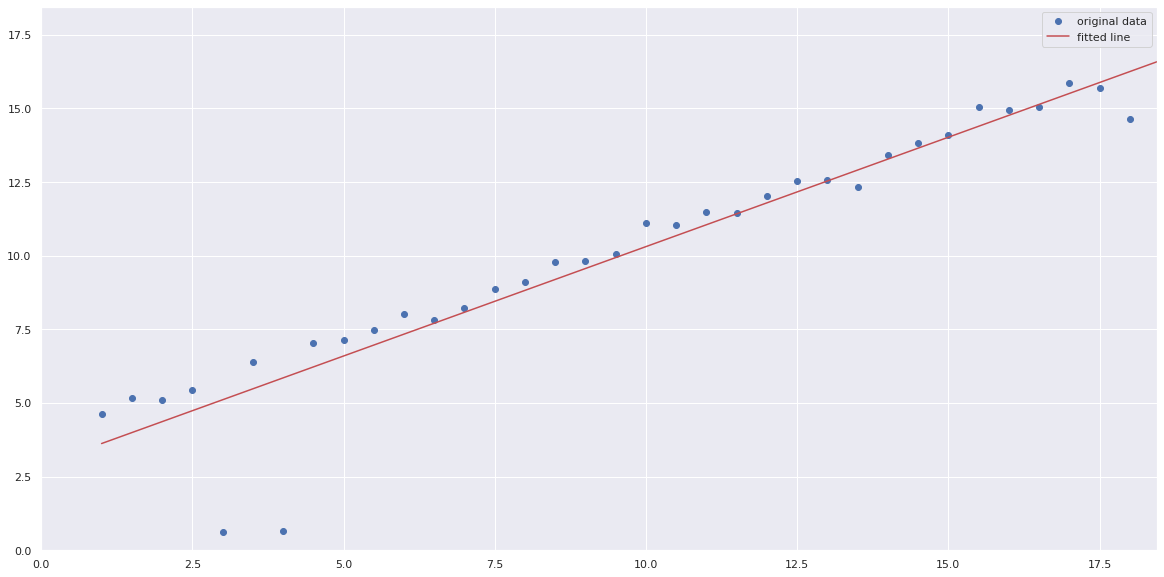

In [ ]:
# Representación final de la recta de regresión
plt.figure(figsize=(20,10))
plt.plot(df["Inversion"], df["Ventas"], 'o', label='original data')
plt.plot(df["Inversion"], coeficiente + pendiente*df["Inversion"], 'r', label='fitted line')
plt.legend()

# limits
plt.xlim(inversion.min()-1 , ventas.max()+1 )
plt.ylim(inversion.min()-1 , ventas.max()+1 )

plt.show()

**COnclusiones finales:** a nivel general se puede concluir que el presente modelo de regresión es explicativo, ya que genera un R2 cercano a 1, lo que implica que hay un buen ajuste. A nivel del error estándar este es pequeño y los resultados se desviación de 0.0378 millones de euros vs los datos reales. Con el paquete StatsModels pudimos cercionarnos que los residuos no son normales, pero no están autocorrelatados por ende los predictores sí son significativos para la variable respuesta. Además el modelo presenta multicolinealidad dada la alta correlación que existe entre la variable Inversión y Ventas. 

Finalmente el último gráfico nos ayuda a ver a nivel visual cómo se comporta nuestro modelo y podemos observar que los puntos están muy cercanos a la línea roja, excepto por dos puntos que están entre 2.5 y 5 millones de euros.